In [1]:
import numpy as np
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class Env:
    def __init__(self):
        self.env =np.zeros((1,6))
        self.state=0
    def step(self, action):
        last=self.state
        if self.state==0:
            action=1
        self.state += action;
        self.env[0][self.state]=10
        self.env[0][last]=0
        if self.state <=5 and self.state >=0: 
            if self.state==5:
                reward=10
            else:
                reward=-1
        else: 
            reward = -100 
        if self.env[0][5] == 10: 
            done = True
        else:
            done = False
        return self.state, reward, done
    def agent_state():
        return self.state
    def reset(self):
        self.env[0]=0
        self.env[0][0] = 10
        self.state=0
        return self.state

In [ ]:
e=Env()

In [ ]:
def final(q_table):
    print("\n\n********BEST SOLUTION********\n")
    current_state=e.reset()
    sns.heatmap(e.env)
    plt.show()
    done=False
    score=0
    for i in range(1, 200):
        if done==True:
            break
        a_idx = np.argmax(q_table[current_state])
        if a_idx==q_table[current_state][0]:
            action=-1
        else:
            action=1
        current_state, reward, done=e.step(action)
        score+=reward
        sns.heatmap(e.env)
        plt.show()
    print(score)



********Q-table********

[[5.66534392 5.66539464]
 [4.60859172 6.73280075]
 [5.66531931 7.81095776]
 [6.73260958 8.89998265]
 [7.81028137 9.99999261]
 [0.         0.        ]]


********BEST SOLUTION********



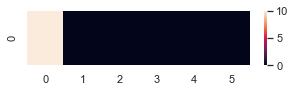

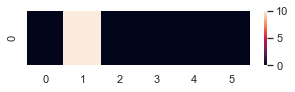

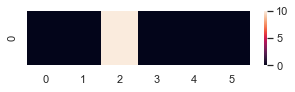

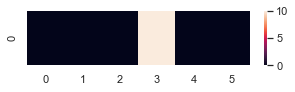

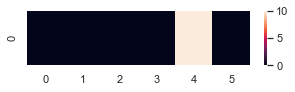

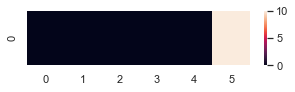

6


In [ ]:
episodes = 200
max_steps_per_episode = 20
q_table = np.zeros((6, 2))

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001
sns.set(rc={'figure.figsize':(5,1)})
rewards_all_episodes = []
for episode in range(1, episodes+1):
    state = e.reset()
    ##sns.heatmap(e.env)
    ##plt.show()
    done = False
    score = 0 
    for x in range(1, max_steps_per_episode):
        if done == True:
            break
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = random.randrange(-1, 2, 2)
        n_state, reward, done = e.step(action)
        if action == -1:
            movement=0
        else:
            movement=action
        q_table[state][movement] = q_table[state][movement] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[n_state, :]))
        state = n_state
        score+=reward
        ##sns.heatmap(e.env)
        ##plt.show()
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(score)
    
    
rewards_per_twenty_episodes = np.split(np.array(rewards_all_episodes),episodes/20)
count = 20

print("\n\n********Q-table********\n")
print(q_table)
final(q_table)